In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import cv2

2025-11-23 14:48:11.130281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763909291.317661      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763909291.374617      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
picture_size = 48
folder_path = "/kaggle/input/fer2013/"
batch_size = 128
epochs = 50


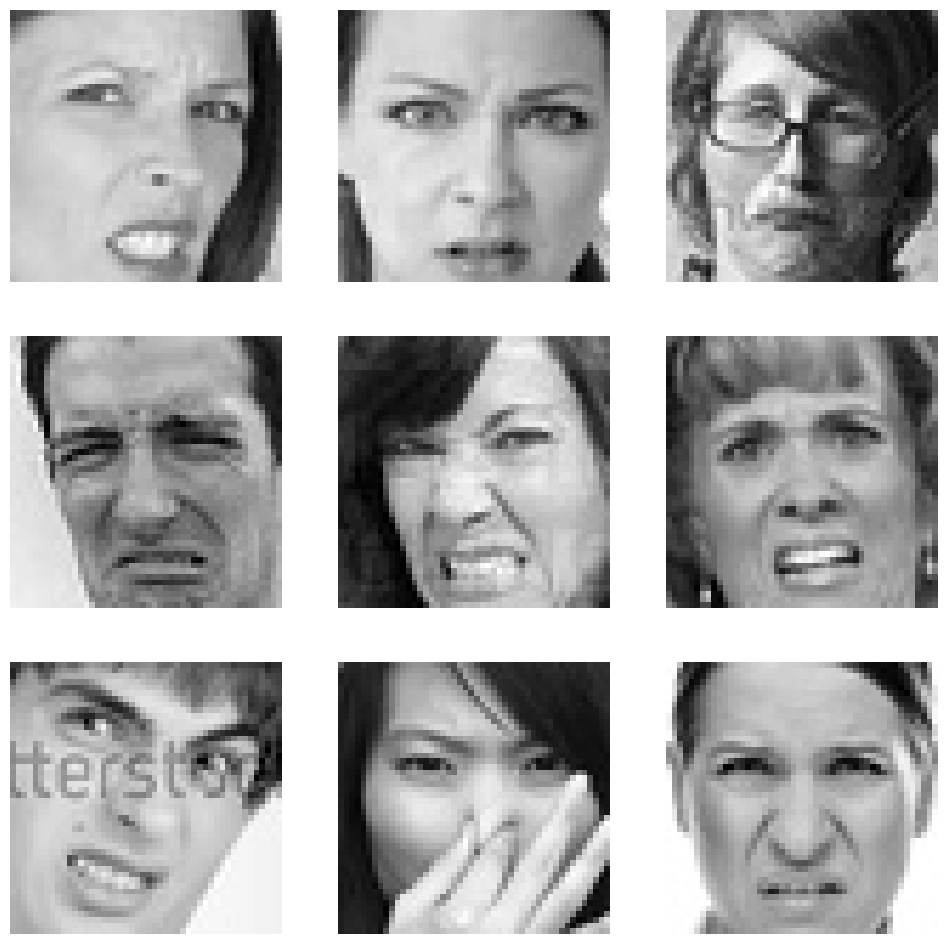

In [3]:
def load_grayscale_image(img_path, target_size=(48, 48)):
    """Load image in grayscale mode"""
    img = load_img(img_path, color_mode='grayscale', target_size=target_size)
    return img

# Visualize grayscale images
expression = 'disgust'
plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_grayscale_image(folder_path + "train/" + expression + "/" + 
                              os.listdir(folder_path + "train/" + expression)[i], 
                              target_size=(picture_size, picture_size))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


In [4]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1./255)


In [5]:
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    folder_path + "test",
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:

def create_emotion_model(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()
    
    # First CNN block
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Second CNN block
    model.add(Conv2D(128, (5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Third CNN block
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fourth CNN block
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatten and dense layers
    model.add(Flatten())
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [7]:
model = create_emotion_model(input_shape=(48, 48, 1), num_classes=7)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763909316.818577      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763909316.819262      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(
    "emotion_model_gray.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=6,
    min_lr=0.0001,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

In [9]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=[checkpoint, reduce_lr, early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1763909324.327276      78 service.cc:148] XLA service 0x7e5474002610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763909324.328126      78 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763909324.328148      78 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763909325.049438      78 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/224 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.1270 - loss: 2.4652   

I0000 00:00:1763909336.137622      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.2113 - loss: 2.0407
Epoch 1: val_accuracy improved from -inf to 0.24749, saving model to emotion_model_gray.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 189s 774ms/step - accuracy: 0.2114 - loss: 2.0403 - val_accuracy: 0.2475 - val_loss: 1.9392 - learning_rate: 0.0010
Epoch 2/50
  1/224 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.3125 - loss: 1.8423

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.24749
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3125 - loss: 1.8423 - val_accuracy: 0.2475 - val_loss: 1.9293 - learning_rate: 0.0010
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.2421 - loss: 1.8426
Epoch 3: val_accuracy did not improve from 0.24749
224/224 ━━━━━━━━━━━━━━━━━━━━ 46s 204ms/step - accuracy: 0.2422 - loss: 1.8425 - val_accuracy: 0.1793 - val_loss: 1.8914 - learning_rate: 0.0010
Epoch 4/50
  1/224 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.2422 - loss: 1.8459
Epoch 4: val_accuracy did not improve from 0.24749
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2422 - loss: 1.8459 - val_accuracy: 0.1782 - val_loss: 1.9056 - learning_rate: 0.0010
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.3028 - loss: 1.7487
Epoch 5: val_accuracy improved from 0.24749 to 0.26479, saving model to emotion_model_gray.keras
224/224 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0

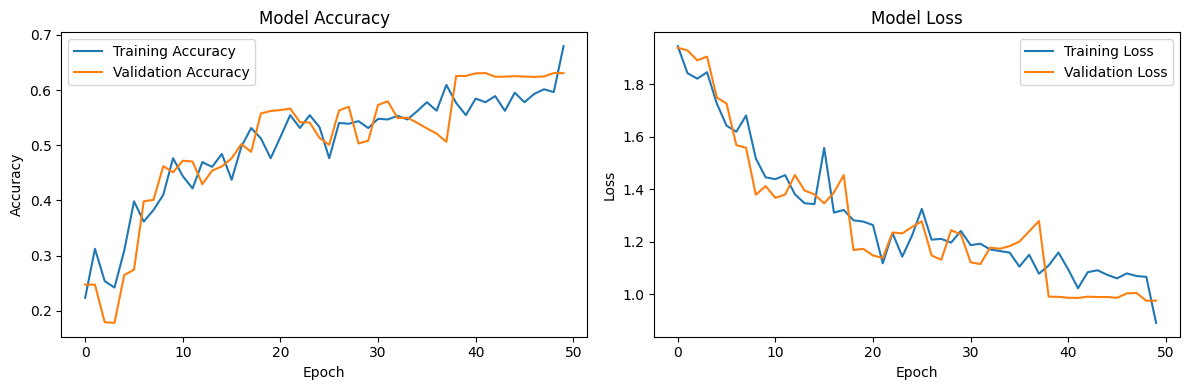

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.5883 - loss: 1.0520
Test Accuracy: 0.6315
Test Loss: 0.9731


In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

In [11]:
# Get a batch of test images
test_images, test_labels = next(test_set)
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


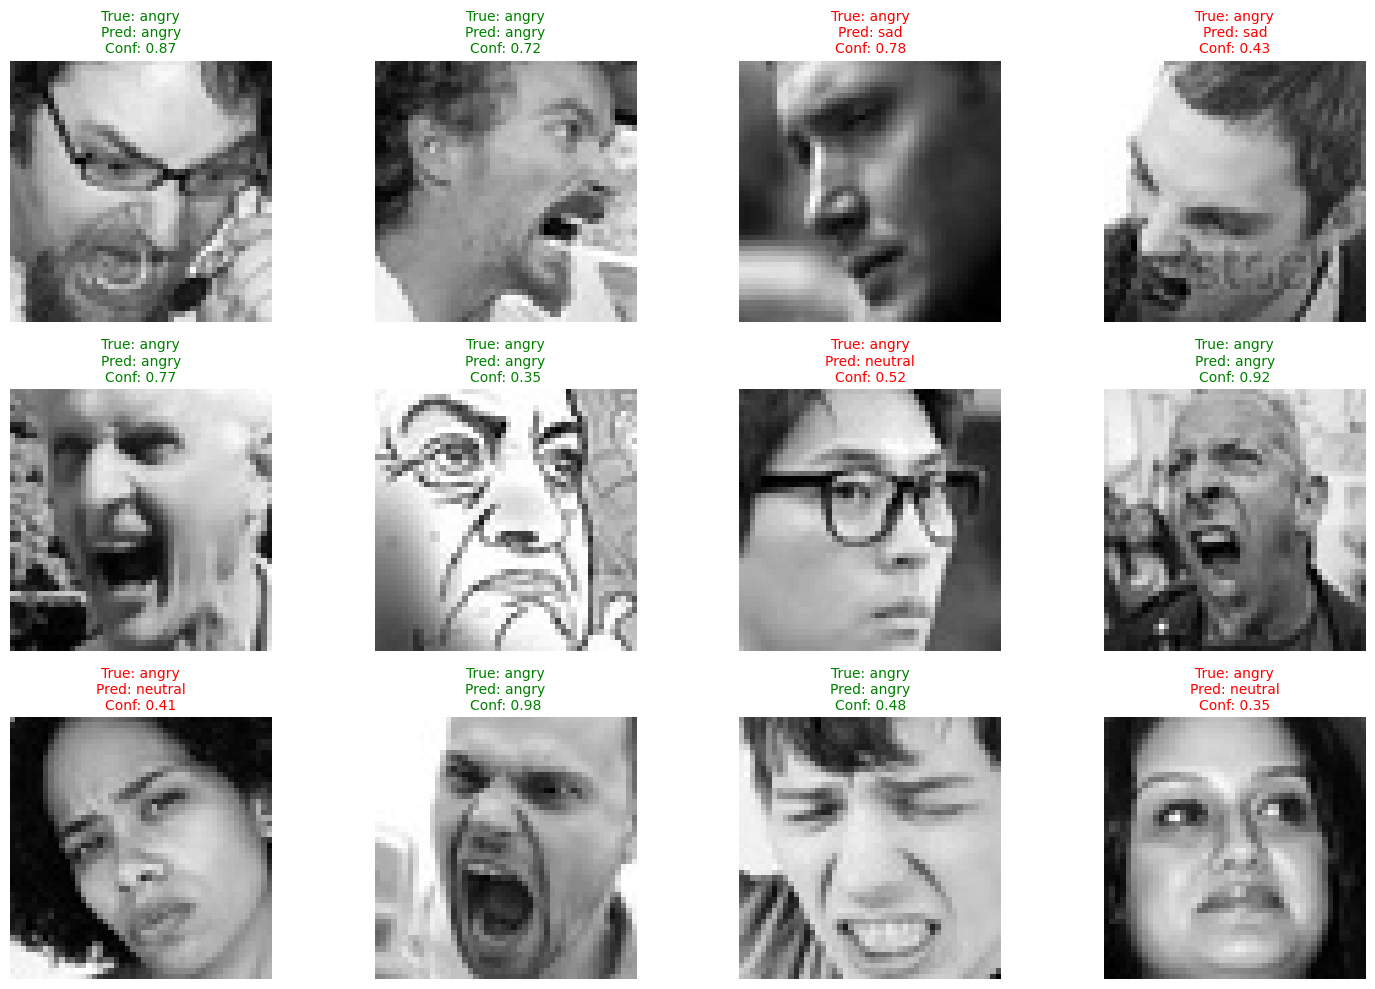

In [12]:
class_labels = list(train_set.class_indices.keys())

# Plot some predictions
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
    
    predicted_label = class_labels[predicted_classes[i]]
    true_label = class_labels[true_classes[i]]
    confidence = np.max(predictions[i])
    
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f'True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}', 
              color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.50      0.61      0.55       958
     disgust       0.57      0.24      0.34       111
        fear       0.55      0.27      0.36      1024
       happy       0.86      0.86      0.86      1774
     neutral       0.51      0.74      0.60      1233
         sad       0.53      0.45      0.49      1247
    surprise       0.76      0.78      0.77       831

    accuracy                           0.63      7178
   macro avg       0.61      0.56      0.57      7178
weighted avg       0.63      0.63      0.62      7178



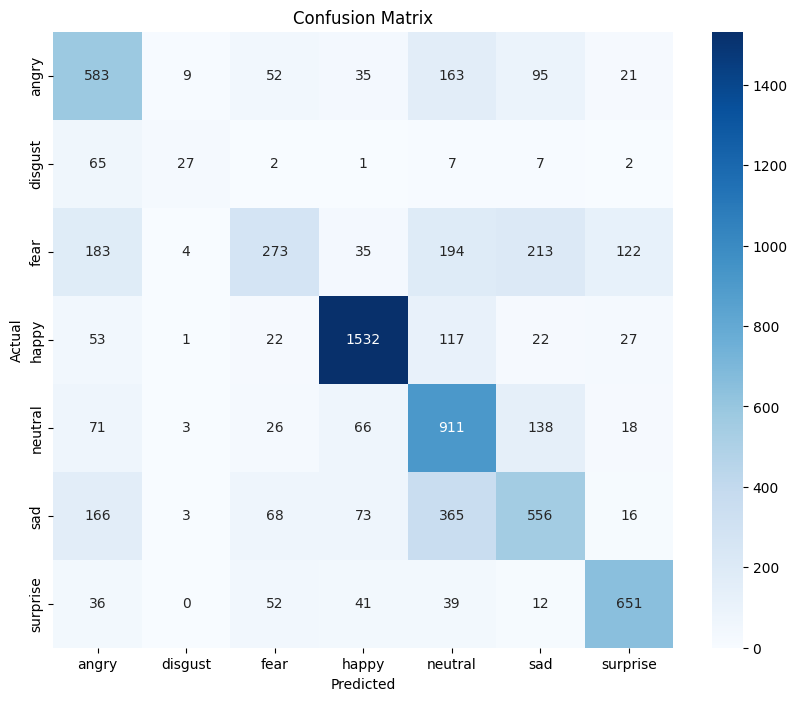

Model saved as 'emotion_model_gray_final.keras'
Model saved as 'emotion_model_gray.h5'


In [13]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get all predictions
all_predictions = model.predict(test_set)
all_predicted_classes = np.argmax(all_predictions, axis=1)
all_true_classes = test_set.classes

# Classification report
print("Classification Report:")
print(classification_report(all_true_classes, all_predicted_classes, 
                          target_names=class_labels))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(all_true_classes, all_predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ===============================
# SAVE THE MODEL
# ===============================

# Save the final model
model.save('emotion_model_gray_final.keras')
print("Model saved as 'emotion_model_gray_final.keras'")

# Save the model in .h5 format for compatibility
model.save('emotion_model_gray.h5')
print("Model saved as 'emotion_model_gray.h5'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


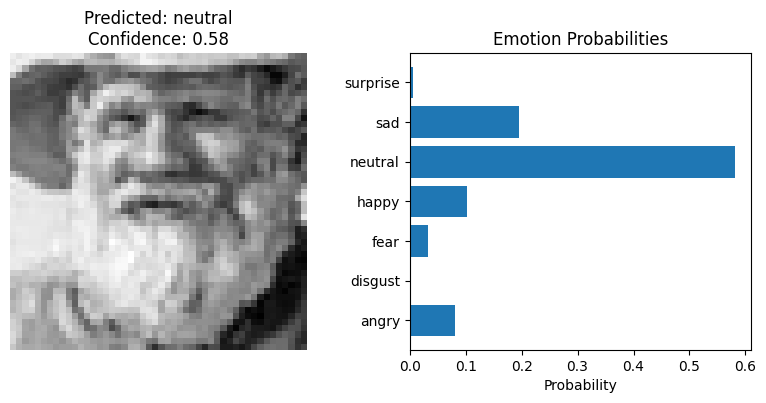

Predicted emotion: neutral with confidence: 0.58


In [14]:

def predict_emotion(image_path, model):
    """Test the model with a single image"""
    # Load image in grayscale
    img = load_grayscale_image(image_path, target_size=(48, 48))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Predict
    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    # Get class label
    class_labels = list(train_set.class_indices.keys())
    predicted_label = class_labels[predicted_class]
    
    # Display results
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {predicted_label}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.barh(class_labels, prediction)
    plt.xlabel('Probability')
    plt.title('Emotion Probabilities')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_label, confidence

# Test with a sample image
sample_image_path = folder_path + "train/happy/" + os.listdir(folder_path + "train/happy")[0]
predicted_emotion, confidence = predict_emotion(sample_image_path, model)
print(f"Predicted emotion: {predicted_emotion} with confidence: {confidence:.2f}")